In [1]:
import enzope as ezp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy
from scipy import stats

### Midamos tiempo de creacion de la red

In [24]:
import time
n_set = np.linspace(10, 10000, 40).astype(int)
times = []
for n in n_set:
    w0 = np.random.rand(n)
    t0 = time.time()
    ezp.GTG(n_nodes=n, theta=n/10, w0=w0)
    tf = time.time()
    times.append(tf-t0)

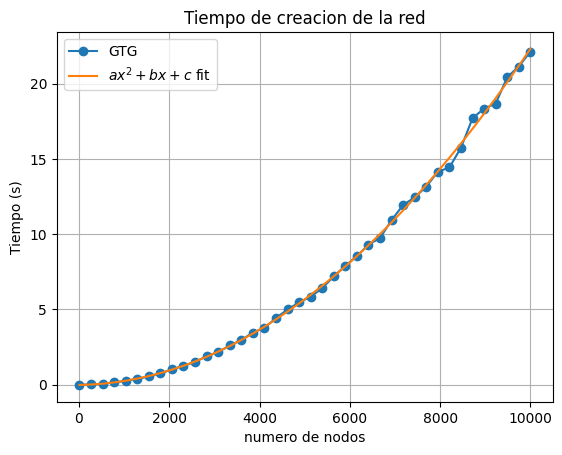

In [46]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

params = scipy.optimize.curve_fit(f, n_set, times)[0]

plt.plot(n_set, times, marker='o', label='GTG')
plt.plot(n_set, f(n_set, *params), label='$ax^2 + bx + c$ fit')
plt.xlabel('numero de nodos')
plt.ylabel('Tiempo (s)')
plt.title('Tiempo de creacion de la red')
plt.grid()
plt.legend()

### Distribucion de pesos uniforme

In [58]:
n_agents = 75000
w0 = np.random.rand(n_agents)
# w0 /= np.sum(w0)
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/40, w0=w0)
gtg.get_mean_connectivity()

122.32264

In [59]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.75
        and gtg.G.nodes[node]['pos'][0] >= 0.25
        and gtg.G.nodes[node]['pos'][1] <= 0.75
        and gtg.G.nodes[node]['pos'][1] >= 0.25
    )
]
len(center_nodes)

18744

In [60]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((75000,), (18744,))

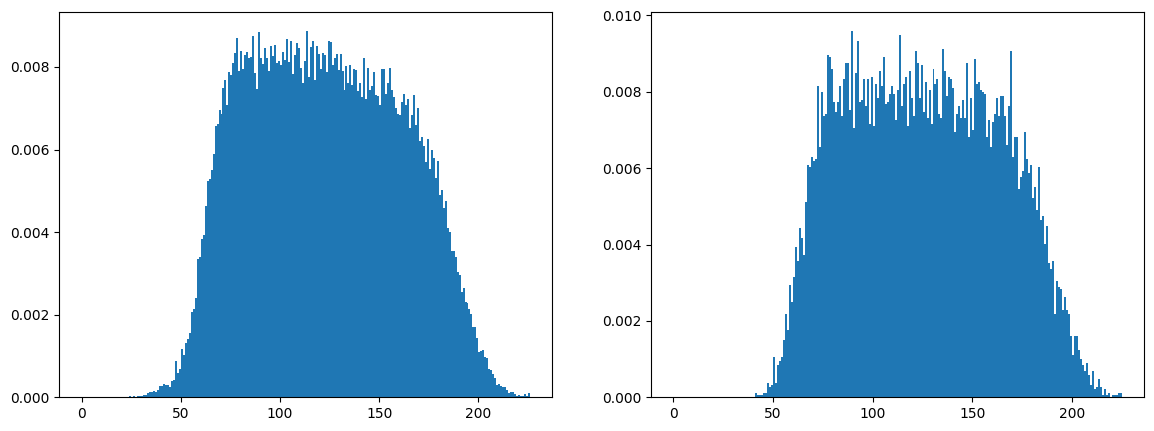

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

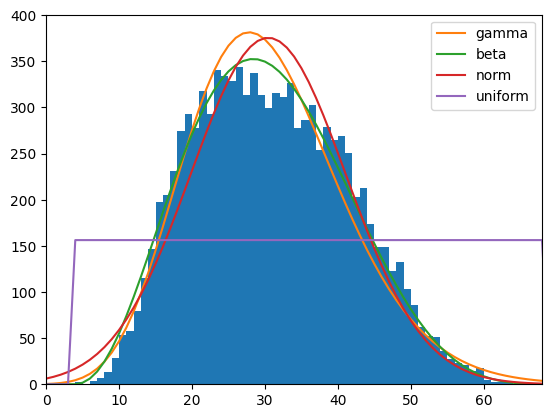

In [189]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['gamma', 'beta', 'norm', 'uniform']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()


### Para una distribucion de pesos exponencial:

In [6]:
n_agents = 20000
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/10)
gtg.get_mean_connectivity()

61.2076

In [7]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.7
        and gtg.G.nodes[node]['pos'][0] >= 0.3
        and gtg.G.nodes[node]['pos'][1] <= 0.7
        and gtg.G.nodes[node]['pos'][1] >= 0.3
    )
]
len(center_nodes)

3252

In [8]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((20000,), (3252,))

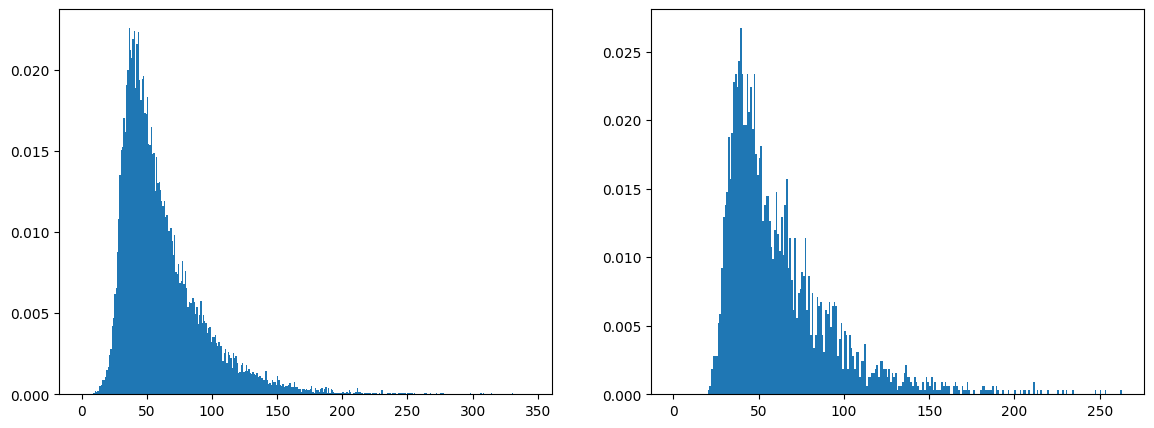

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

/home/lautaro/anaconda3/envs/abm/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/lautaro/anaconda3/envs/abm/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


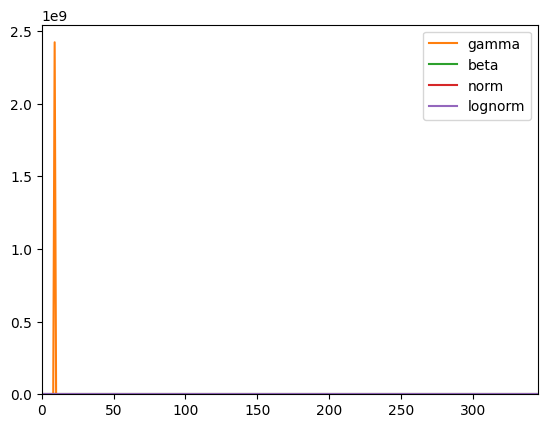

In [10]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['gamma', 'beta', 'norm', 'lognorm']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()


### Distribucion uniforme para red multiplicativa

In [ ]:
n_agents = 10000
w0 = np.random.rand(n_agents)
# w0 /= np.sum(w0)
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/10, w0=w0, join='mul')
gtg.get_mean_connectivity()

7.966

In [ ]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.7
        and gtg.G.nodes[node]['pos'][0] >= 0.3
        and gtg.G.nodes[node]['pos'][1] <= 0.7
        and gtg.G.nodes[node]['pos'][1] >= 0.3
    )
]
len(center_nodes)

1572

In [ ]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((10000,), (1572,))

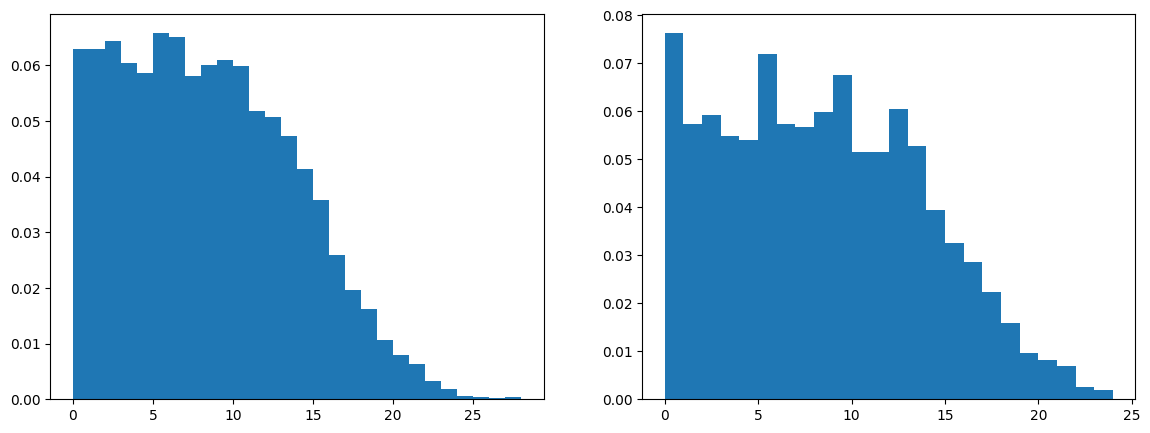

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

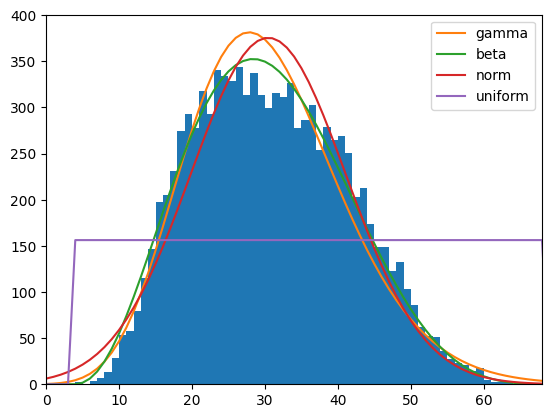

In [ ]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['gamma', 'beta', 'norm', 'uniform']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()


### Para una distribucion de pesos exponencial (multiplicativa):

In [26]:
n_agents = 30000
gtg = ezp.GTG(n_nodes=n_agents, theta=n_agents/5, join='mul')
gtg.get_mean_connectivity()

15.0688

In [27]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.7
        and gtg.G.nodes[node]['pos'][0] >= 0.3
        and gtg.G.nodes[node]['pos'][1] <= 0.7
        and gtg.G.nodes[node]['pos'][1] >= 0.3
    )
]
len(center_nodes)

4861

In [28]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((30000,), (4861,))

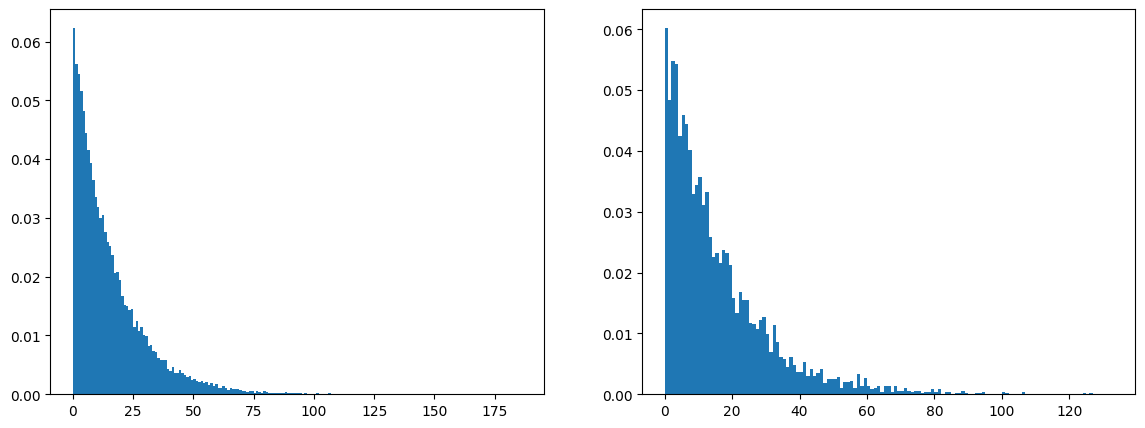

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.hist(n_neighs, bins=range(max(n_neighs)), density=True);
ax2.hist(center_n_neighs, bins=range(max(center_n_neighs)), density=True);

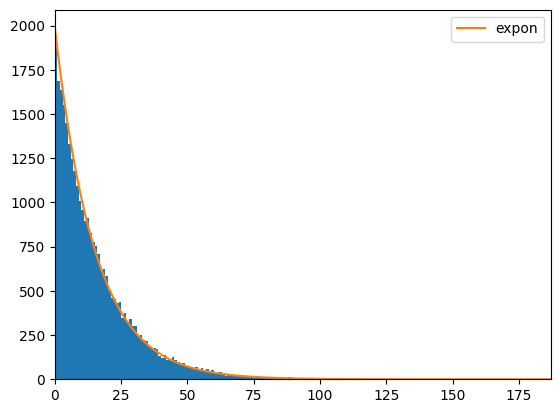

In [30]:
size = n_agents
x = np.arange(size)
y = n_neighs
h = plt.hist(n_neighs, bins=range(max(n_neighs)))

dist_names = ['expon']
# dist_names = [ 'alpha', 'anglit', 'arcsine', 'beta', 'betaprime', 'bradford', 'burr', 'cauchy', 'chi', 'chi2', 'cosine', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponweib', 'exponpow', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'genlogistic', 'genpareto', 'genexpon', 'genextreme', 'gausshyper', 'gamma', 'gengamma', 'genhalflogistic', 'gilbrat', 'gompertz', 'gumbel_r', 'gumbel_l', 'halfcauchy', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'ksone', 'kstwobign', 'laplace', 'logistic', 'loggamma', 'loglaplace', 'lognorm', 'lomax', 'maxwell', 'mielke', 'nakagami', 'ncx2', 'ncf', 'nct', 'norm', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rdist', 'reciprocal', 'rayleigh', 'rice', 'recipinvgauss', 'semicircular', 't', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'wald', 'weibull_min', 'weibull_max', 'wrapcauchy'] 
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, max(n_neighs))
plt.legend(loc='upper right')
plt.show()


### Distribucion tipo Pareto

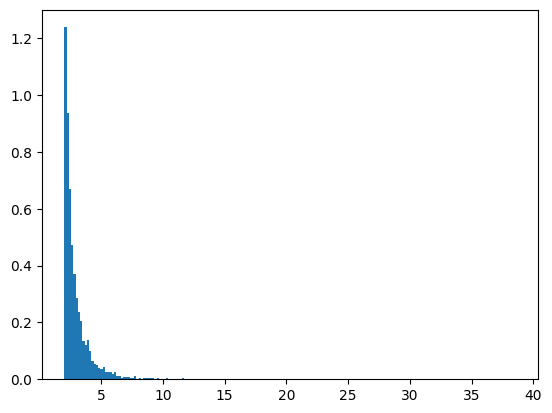

In [9]:
a, m = 3., 2.  # shape and mode

s = (np.random.default_rng().pareto(a, 3000) + 1) * m

count, bins, _ = plt.hist(s, 200, density=True)

# fit = a*m**a / bins**(a+1)

# plt.plot(bins, max(count)*fit/max(fit), linewidth=2, color='r')

plt.show()


6.7 7.3


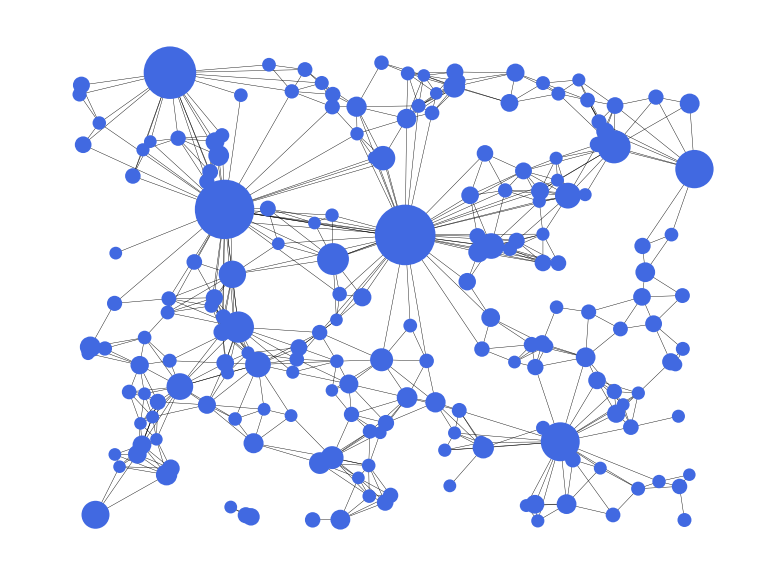

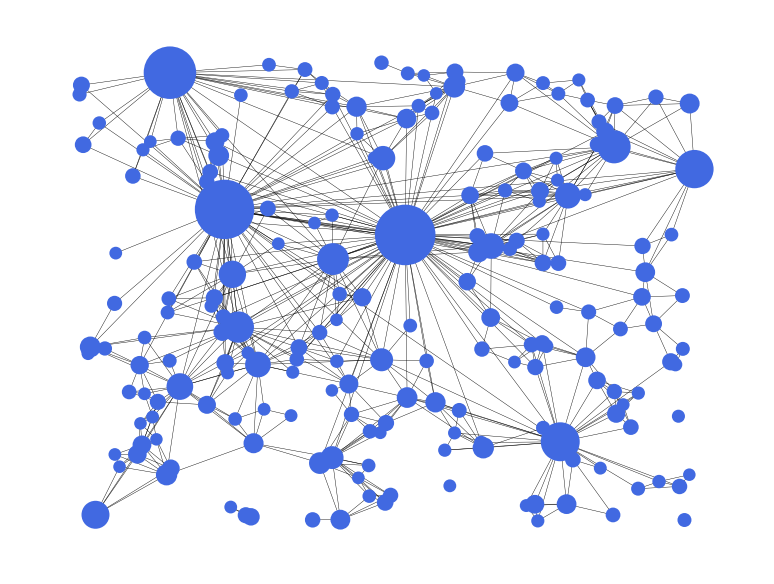

In [90]:
n_agents = 200
a, m = 1.5, 1.  # shape and mode
theta = 2 * n_agents
w0 = (np.random.default_rng().pareto(a, n_agents) + 1) * m
w0 = dict(enumerate(w0))
gtg = ezp.GTG(n_nodes=n_agents, theta=theta, w0=w0, plotable=True)
posi = gtg.posi
gtgm = ezp.GTG(n_nodes=n_agents, theta=theta, w0=w0, plotable=True, posi=posi, join='mul')
print(gtg.get_mean_connectivity(), gtgm.get_mean_connectivity())
gtg.plot_snapshot()
gtgm.plot_snapshot()

In [161]:
n_agents = 60000
a, m = 1.5, 1.  # shape and mode
w0 = (np.random.default_rng().pareto(a, n_agents) + 1) * m
w0 = dict(enumerate(w0))
gtg = ezp.GTG(n_nodes=n_agents, theta=2*n_agents, w0=w0)
print(gtg.get_mean_connectivity())

9.077966666666667


In [162]:
np.mean([gtg.G.nodes[i]['pos'] for i in range(n_agents)], axis=0)

center_nodes = [
    node
    for node in gtg.G.nodes
    if (
        gtg.G.nodes[node]['pos'][0] <= 0.75
        and gtg.G.nodes[node]['pos'][0] >= 0.25
        and gtg.G.nodes[node]['pos'][1] <= 0.75
        and gtg.G.nodes[node]['pos'][1] >= 0.25
    )
]
len(center_nodes)

14991

In [163]:
n_neighs = np.array(list(dict(nx.degree(gtg.G)).values()))
center_n_neighs = n_neighs[center_nodes]
# n_neighs /= np.sum(n_neighs)
n_neighs.shape, center_n_neighs.shape

((60000,), (14991,))

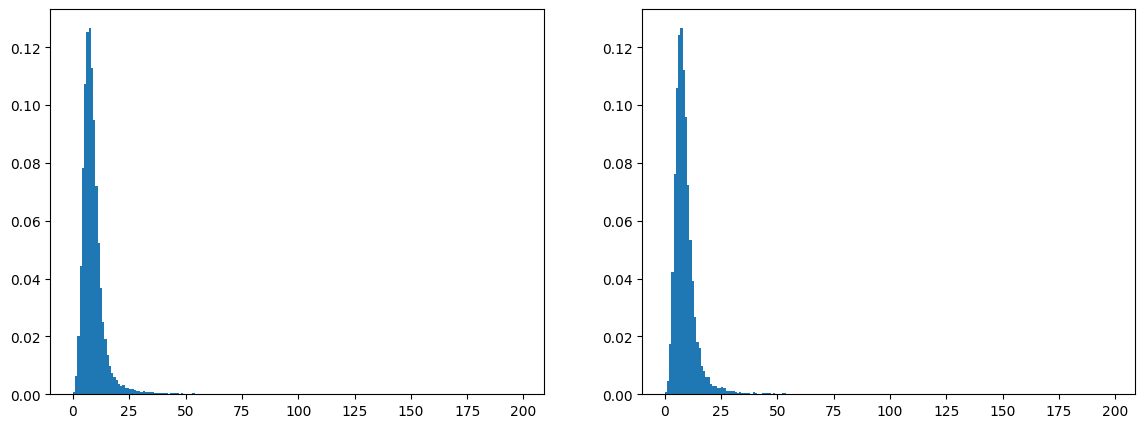

In [164]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
hist1 = ax1.hist(n_neighs, bins=range(200), density=True);
ax2.hist(center_n_neighs, bins=range(200), density=True);

(1.4277686148021915, 8.11869114973004, 19.881308850269956)


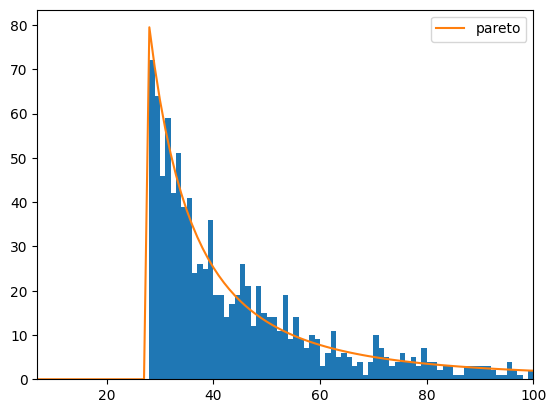

In [165]:
peak = np.argmax(hist1[0])
tail = n_neighs[n_neighs > peak + 20]
size = len(tail)
x = np.arange(size)
y = tail
h = plt.hist(tail, bins=range(peak, 200))

dist_names = ['pareto']
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    params = dist.fit(y)
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]
    if arg:
        pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale) * size
    else:
        pdf_fitted = dist.pdf(x, loc=loc, scale=scale) * size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(min, 100)
plt.legend(loc='upper right')
print(params)
plt.show()